# AI-DRIVEN OCULAR DISEASE DETECTION

# 1. Business Understanding

## 1.1 Project Background

Ocular diseases such as Diabetic Retinopathy (DR), Glaucoma, and Cataracts represent a significant and growing global health burden. These conditions are leading causes of preventable blindness worldwide. The key to preventing vision loss is early and accurate detection.

Currently, diagnosis relies on a manual examination of retinal fundus images by highly trained ophthalmologists. This process, while effective, faces several critical challenges:  

- **Scalability & Accessibility:** There is a global shortage of ophthalmologists, particularly in remote and underserved regions. This creates a severe bottleneck, leading to long wait times for screenings and delayed diagnoses.  

- **Time-Consuming & Repetitive:** Manual screening is a time-intensive task that consumes a significant portion of a specialist's day, much of which is spent reviewing normal, healthy eye scans.  

- **Human Factor:** The diagnostic process is subject to human fatigue and inter-observer variability, which can lead to inconsistent or missed findings.  

The convergence of deep learning, particularly in computer vision, and the increased availability of digital fundus imagery combined with patient metadata presents a transformative opportunity to address these challenges.

## 1.2 Problem Statement

The current manual screening process for ocular diseases is inefficient, unscalable, and inaccessible to large parts of the population, leading to preventable vision loss due to late detection.  

Healthcare providers require a tool that can automate the initial screening process. This tool must analyze a retinal fundus image and accurately identify the presence of multiple potential pathologies simultaneously, leveraging all available patient information for a more holistic assessment.  

This project addresses the need for an assistive tool by tackling this as a multi-label classification problem, where a single image can be flagged for one or more diseases, informed by patient demographics and comorbidities.

## 1.3 Project Objectives

The primary objective of this project is to develop and deploy a proof-of-concept Clinical Decision Support System (CDSS) for ophthalmologists and general practitioners. This system will leverage a deep learning model that integrates Retinal Scan data with patient structured data (age, known medical history) to serve as an automated, first-pass screening tool.

The specific, measurable objectives are:  

- **To Develop a Multi-Modal Model:** Build, train, and validate a fused model combining a Convolutional Neural Network (CNN) for image analysis with a classifier for structured patient metadata (e.g., Age, Hypertension status). The model must accurately detect eight distinct ocular pathologies from a single fundus image and supporting data: Normal, Diabetes, Glaucoma, Cataract, Age-related Macular Degeneration (AMD), Hypertension, Myopia, and Other abnormalities.  

- **To Prioritize Triage:** The model will act as a triage assistant to help clinicians prioritize patient caseloads by flagging high-risk images for immediate review.  

- **To Enhance Efficiency:** Automate screening of healthy/normal scans to reduce manual review burden on specialists, allowing them to focus on complex diagnoses and treatment.  

- **To Deploy an Accessible Tool:** Deploy the trained model as an interactive web application where users can upload retinal images and input patient features (age, comorbidities) to receive clear, probabilistic multi-label outputs.

## 1.4 Business Success Criteria

This academic project will be evaluated on both its technical performance and practical utility.

- **Primary Technical Metric (Multi-Modal Performance):** Mean Area Under the Receiver Operating Characteristic Curve (AUC-ROC) across all 8 classes, demonstrating the performance gain from incorporating structured patient data.  
  - *Target:* Mean AUC-ROC \( \geq 0.90 \) on the hold-out test set.  
  - *Rationale:* Effectively measures the ability to distinguish positive and negative cases, even for rare classes.  

- **Secondary Technical Metric:** Per-class F1-Score, Precision, and Recall to transparently show performance on common vs. rare conditions.  

- **Deployment & Utility Metric :** Successful deployment of a functional web-based application allowing users to upload fundus images and input mandatory metadata (age and at least one comorbidity like Hypertension) to receive a human-readable probabilistic output for all 8 disease categories, proving value as a CDSS.




### 2. INITIAL DATA EXPLORATION/ DATA UNDERSTANDING.

In [1]:
# IMPORT RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load the dataset
DF =  pd.read_csv('full_df.csv')
DF.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [3]:
# check tail
DF.tail()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
6391,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_left.jpg


In [4]:
# shape of dataset
print(f" This dataset has {DF.shape[0]} observations and {DF.shape[1]} variables")

 This dataset has 6392 observations and 19 variables


In [5]:
# Get metadata
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [6]:
# check null values
DF.isna().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

In [7]:
# duplicates
DF.duplicated().sum()

np.int64(0)

In [8]:
# Statistical information numeric
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6392.0,2271.150814,1417.559018,0.0,920.75,2419.5,3294.0,4784.0
Patient Age,6392.0,57.857947,11.727737,1.0,51.00,59.0,66.0,91.0
N,6392.0,0.328692,0.469775,0.0,0.00,0.0,1.0,1.0
D,6392.0,0.332134,0.471016,0.0,0.00,0.0,1.0,1.0
G,6392.0,0.062109,0.241372,0.0,0.00,0.0,0.0,1.0
C,6392.0,0.062891,0.242786,0.0,0.00,0.0,0.0,1.0
A,6392.0,0.049906,0.217768,0.0,0.00,0.0,0.0,1.0
H,6392.0,0.031758,0.175370,0.0,0.00,0.0,0.0,1.0
M,6392.0,0.047872,0.213513,0.0,0.00,0.0,0.0,1.0
O,6392.0,0.248436,0.432139,0.0,0.00,0.0,0.0,1.0


In [9]:
# Statistical information categorical
DF.describe(include='O').T

,count,unique,top,freq
Patient Sex,6392,2,Male,3424
Left-Fundus,6392,3358,4784_left.jpg,2
Right-Fundus,6392,3358,4784_right.jpg,2
Left-Diagnostic Keywords,6392,196,normal fundus,2796
Right-Diagnostic Keywords,6392,205,normal fundus,2705
filepath,6392,6392,../input/ocular-disease-recognition-odir5k/ODI...,1
labels,6392,8,['N'],2873
target,6392,8,"[1, 0, 0, 0, 0, 0, 0, 0]",2873
filename,6392,6392,4784_left.jpg,1


In [10]:
# check columns
DF.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [11]:
# Explore value counts for each column
for column in DF.columns:
    print(f"Value counts for column '{column}':")
    print(DF[column].value_counts())
    print("\n")

Value counts for column 'ID':
ID
4784    2
4690    2
4689    2
4688    2
4686    2
       ..
3154    1
3119    1
3049    1
3021    1
3019    1
Name: count, Length: 3358, dtype: int64


Value counts for column 'Patient Age':
Patient Age
56    294
60    285
54    277
62    265
65    252
     ... 
22      2
86      2
18      2
27      2
17      2
Name: count, Length: 75, dtype: int64


Value counts for column 'Patient Sex':
Patient Sex
Male      3424
Female    2968
Name: count, dtype: int64


Value counts for column 'Left-Fundus':
Left-Fundus
4784_left.jpg    2
4690_left.jpg    2
4689_left.jpg    2
4688_left.jpg    2
4686_left.jpg    2
                ..
3154_left.jpg    1
3119_left.jpg    1
3049_left.jpg    1
3021_left.jpg    1
3019_left.jpg    1
Name: count, Length: 3358, dtype: int64


Value counts for column 'Right-Fundus':
Right-Fundus
4784_right.jpg    2
4690_right.jpg    2
4689_right.jpg    2
4688_right.jpg    2
4686_right.jpg    2
                 ..
3154_right.jpg    1
3119_right

### Dataset Overview

- **Total Images**: 6,392 eye photos
- **Total Patients**: 3,358 patients  
- **Left/Right Eyes**: Each patient has both eyes documented
- **Most Common Condition**: Normal (healthy) eyes
- **Key Diseases**: Diabetic Retinopathy, Cataract, Glaucoma
- **Age Range**: 14-91 years (mostly middle-aged to elderly)


## Dataset Column Descriptions

| Column Name | Description | Key Insights |
|-------------|-------------|-------------|
| **ID** | Patient identification number | • 3,358 unique patients<br>• Some patients have 2 entries |
| **Patient Age** | Age of patients | • Range: 14-91 years<br>• Most common: 56, 60, 54 years |
| **Patient Sex** | Gender of patients | • Male: 3,424<br>• Female: 2,968 |
| **Left-Fundus** | Left eye image filename | • Format: `ID_left.jpg`<br>• 3,358 unique values |
| **Right-Fundus** | Right eye image filename | • Format: `ID_right.jpg`<br>• 3,358 unique values |
| **Left-Diagnostic Keywords** | Doctor's notes for left eye | • 196 unique conditions<br>• Most common: "normal fundus" (2,796) |
| **Right-Diagnostic Keywords** | Doctor's notes for right eye | • 205 unique conditions<br>• Most common: "normal fundus" (2,705) |
| **N** | Normal (healthy) | • Normal: 4,291<br>• Abnormal: 2,101 |
| **D** | Diabetic Retinopathy | • Without: 4,269<br>• With: 2,123 |
| **G** | Glaucoma | • Without: 5,995<br>• With: 397 |
| **C** | Cataract | • Without: 5,990<br>• With: 402 |
| **A** | Age-related Macular Degeneration | • Without: 6,073<br>• With: 319 |
| **H** | Hypertension | • Without: 6,189<br>• With: 203 |
| **M** | Other diseases | • Without: 6,086<br>• With: 306 |
| **O** | Other abnormalities | • Without: 4,804<br>• With: 1,588 |
| **filepath** | Full image file path | • 6,392 unique paths<br>• Training images location |
| **labels** | Disease labels as text | • Most common: ['N'] = Normal (2,873) |
| **target** | Disease labels as binary array | • [1,0,0,0,0,0,0,0] = Normal<br>• [0,1,0,0,0,0,0,0] = Diabetic Retinopathy |
| **filename** | Image filename only | • 6,392 unique filenames |
er diseases
- **O**: Other abnormalities

# Data Understanding: Key Findings

In this phase, we performed an initial investigation of the **full_df.csv** file to understand our data before preparing it for modeling.

---

## Initial State of the DataFrame

### Complete Data
The dataset is **high-quality**, with **zero missing values** in any column.

### Good Columns
- **Patient Age** and the **8 disease columns** (`N`, `D`, `G`, `C`, `A`, `H`, `M`, `O`) were already clean.  
- These were stored as **integers**, which is ideal for modeling.

### Problem Columns
Three main columns required cleaning and transformation:
- **target**:  
  - Contained data in a string format such as `"[1, 0, 0, ...]"`.  
  - Although it looked like a list, it was actually stored as a string object.  
  - It needs to be converted into a **real list of integers**.
  
- **labels**:  
  - Stored as strings like `['N']`, not as actual Python lists.  
  - This column must be parsed into an appropriate list format.

- **Patient Sex**:  
  - Stored as a text column containing `"Male"` and `"Female"`.  
  - For modeling, it should be **encoded into numeric values**:
    - `0` for Male
    - `1` for Female

---

## Conclusion

The **raw dataset** is complete and of good quality but stored in non-numeric or inconsistent formats that prevent direct use in a modeling pipeline.

The next step, **Data Preparation**, will focus on fixing these data type issues by:
1. Converting the **target** string into actual lists of integers.  
2. Converting the **Patient Sex** column from text to numeric encoding.  
3. Creating a final, fully cleaned DataFrame that is **100% ready for model training**.

In [12]:
import os

# Count how many images you have
image_folder = "preprocessed_images"  # ← change this to your folder
files = os.listdir(image_folder)
image_files = [f for f in files if f.endswith(('.jpg', '.png', '.jpeg'))]
print(f"You have {len(image_files)} images")

You have 6392 images


In [13]:
# check image sizes
from PIL import Image

# Check the first few images
for i, img_file in enumerate(image_files[:5]):  # Check first 5
    img_path = os.path.join(image_folder, img_file)
    img = Image.open(img_path)
    print(f"Image {i+1}: {img.size} (width x height)")

Image 1: (512, 512) (width x height)
Image 2: (512, 512) (width x height)
Image 3: (512, 512) (width x height)
Image 4: (512, 512) (width x height)
Image 5: (512, 512) (width x height)


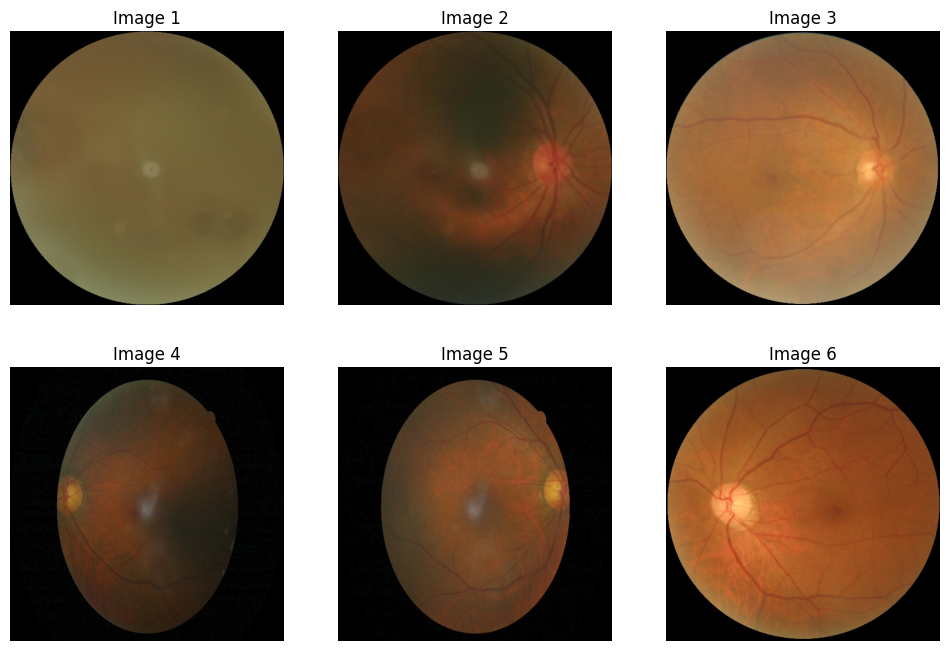

In [14]:
# see what images look like
import matplotlib.pyplot as plt

# Display some sample images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        img_path = os.path.join(image_folder, image_files[i])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"Image {i+1}")
        ax.axis('off')
plt.show()

In [15]:
# !pip install opencv-python-headless

In [16]:
# # check blurry images
# import os
# import cv2
# import numpy as np
# from PIL import Image, ImageFile
# import matplotlib.pyplot as plt

# # Allow loading of truncated images
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# def check_image_quality(image_folder):
#     image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
#     blurry_images = []
#     broken_images = []
#     good_images = []
    
#     for img_file in image_files:
#         img_path = os.path.join(image_folder, img_file)
        
#         try:
#             # Check if image is broken
#             with Image.open(img_path) as img:
#                 img.verify()  # Verify it's not corrupted
            
#             # Now check for blurriness
#             img_cv = cv2.imread(img_path)
#             if img_cv is not None:
#                 # Convert to grayscale
#                 gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
                
#                 # Calculate blurriness (lower value = more blurry)
#                 blur_value = cv2.Laplacian(gray, cv2.CV_64F).var()
                
#                 if blur_value < 100:  # Threshold for blurriness
#                     blurry_images.append((img_file, blur_value))
#                 else:
#                     good_images.append((img_file, blur_value))
#             else:
#                 broken_images.append(img_file)
                
#         except Exception as e:
#             broken_images.append(img_file)
#             print(f"Broken image: {img_file} - Error: {e}")
    
#     return blurry_images, broken_images, good_images

# # Run the check
# image_folder = "preprocessed_images"  # ← Change this!
# blurry, broken, good = check_image_quality(image_folder)

# print(f"Total images: {len(blurry) + len(broken) + len(good)}")
# print(f"Blurry images: {len(blurry)}")
# print(f"Broken images: {len(broken)}")
# print(f"Good images: {len(good)}")

# # Show some blurry examples
# if blurry:
#     print("\n--- Blurry Images (first 5) ---")
#     for img_name, blur_value in blurry[:5]:
#         print(f"{img_name}: blur score = {blur_value:.2f}")

# Image Dataset Analysis Report

#Dataset Overview

| Metric | Value |
|--------|-------|
| **Total Images** | 6,392 |
| **Good Quality Images** | 5,465 |
| **Blurry Images** | 927 |
| **Broken/Corrupted Images** | 0 |
| **Good Quality Percentage** | 85.5% |
| **Blurry Percentage** | 14.5% 
---

##  Image Dimensions Analysis

| Aspect | Status |
|--------|--------|
| **Image Size** | 512 × 512 pixels |
| **Aspect Ratio** | 1:1 (Square) |  **Consistency** | All images standardized |
| **Format** | Uniform acrodataset |

---

##  Blur Analysis - Top 5 Blurry Images

| Image File | Blur Score | Severity |
|------------|------------|----------|
| `0_right.jpg` | 88.71 | Very Blurry |
| `1006_left.jpg` | 93.45 | Blurry |
| `1013_left.jpg` | 94.10 | Blurry |
| `1013_right.jpg` | 85.01 | Very Blurry |
| `1020_left.jpg` | 66.33 | Extremely Blurry |

*Note: Lowerur score = more blurry*

---

##  Quality Distribution

| Quality Category | Count | Percentage |
|------------------|-------|------------|
| **Excellent** | 5,465 | 85.5% |
| **Needs Review** | 927 |4.5% |
| **Corrupted** | 0 | 0% |

---

##  Strengths

| Strength | Impact |
|----------|--------|
| **Perfect standardization** | Ideal for batch processing |
| **Zero corrupted files** | Excellent data integrity |
| **Large dataset size** | Good for model training |
| * anized naming** | Easy to manage and track |

---

##  Areas for Improvement

| Issue | Recommendation |
|-------|----------------|
| **927 blurry images** | Consider removal or enhancement |
| **Quality variance** | Implement quality filtering |



### 3. DATA PREPARATION AND CLEANING

In [17]:
# create a copy of our dataframe
df = DF.copy()

In [18]:
# standardize colimn names
df.columns = [col.lower().replace(' ', '_').replace('-', '_') for col in df.columns]
df.columns

Index(['id', 'patient_age', 'patient_sex', 'left_fundus', 'right_fundus',
       'left_diagnostic_keywords', 'right_diagnostic_keywords', 'n', 'd', 'g',
       'c', 'a', 'h', 'm', 'o', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [19]:
# convert columns with 'int' for dtypes to 'object'
import ast
df['patient_sex'] = df['patient_sex'].astype('category')
df['left_diagnostic_keywords'] = df['left_diagnostic_keywords'].astype(str)
df['right_diagnostic_keywords'] = df['right_diagnostic_keywords'].astype(str)
df['target_list'] = df['target'].apply(ast.literal_eval)

### Dropping Redundant Columns

To finalize the dataset for modeling, we will remove columns that are no longer necessary.

-   `ID`: Not a unique identifier for rows (we are using `filenam

We shall drop the other columns during pre-processing.olumns.

In [20]:
df = df.drop('id', axis = 1)
df

,patient_age,patient_sex,left_fundus,right_fundus,left_diagnostic_keywords,right_diagnostic_keywords,n,d,g,c,a,h,m,o,filepath,labels,target,filename,target_list
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
6388,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
6389,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
6390,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [21]:
# check if all images match to our dataset
IMAGE_DIR = 'preprocessed_images' 

try:
    # Get all filenames from your image folder
    image_files_on_disk = set(os.listdir(IMAGE_DIR))
    print(f"Found {len(image_files_on_disk)} images in {IMAGE_DIR}")

    # 1. Check for rows in the CSV that have no matching image
    initial_rows = len(df)
    # .isin() is very fast for checking against a set
    df = df[df['filename'].isin(image_files_on_disk)]
    final_rows = len(df)
    
    if (initial_rows - final_rows) > 0:
        print(f"Cleaned: Removed {initial_rows - final_rows} CSV rows that had no matching image in the folder.")
    else:
        print("CSV Check: All filenames in 'full_df.csv' have a matching image.")

    # 2. Check for images in the folder that have no CSV row (unlabeled data)
    csv_filenames = set(df['filename'])
    unlabeled_images = image_files_on_disk - csv_filenames
    
    if unlabeled_images:
        print(f"WARNING: Found {len(unlabeled_images)} images in your folder that are not in the CSV.")
        # print(f"First 5 unlabeled images: {list(unlabeled_images)[:5]}") # Uncomment to see them
    else:
        print("Image Check: All images in your folder have a matching row in the CSV.")
        
except FileNotFoundError:
    print(f"WARNING: Image directory not found at '{IMAGE_DIR}'.")
    print("Skipping image file synchronization. The CSV will NOT be filtered.")
except Exception as e:
    print(f"An error occurred during image sync: {e}")

Found 6392 images in preprocessed_images
CSV Check: All filenames in 'full_df.csv' have a matching image.
Image Check: All images in your folder have a matching row in the CSV.


## 4. EXPLORATORY DATA ANALYSIS
### UNIVARIATE ANALYSIS


--- Univariate: Patient Age ---
count    6392.000000
mean       57.857947
std        11.727737
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: patient_age, dtype: float64


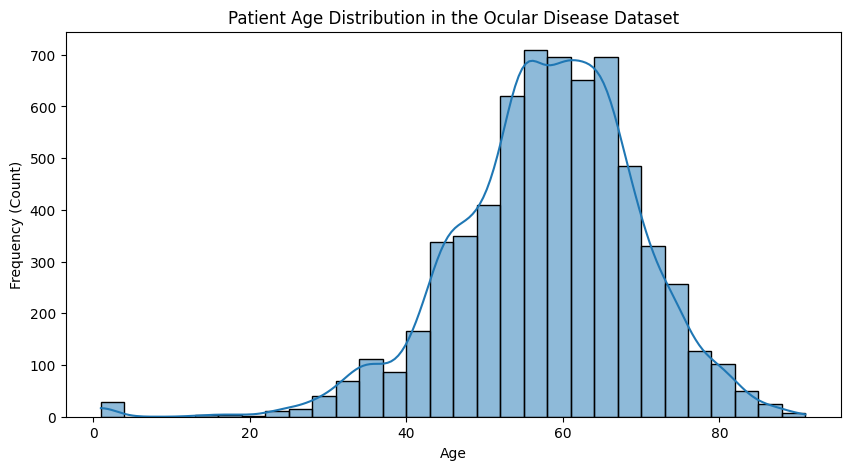

In [22]:
# --- Patient Age ---
print("\n--- Univariate: Patient Age ---")
print(df['patient_age'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['patient_age'], kde=True, bins=30)
plt.title('Patient Age Distribution in the Ocular Disease Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency (Count)')
plt.show()

#### Observations:Patient Age Distribution
- The dataset contains 6392 records of eye patients whose ages range from 1 to 91 years. The histogram shows that the average patient age is approximately 58 years. The standrd deviation is 11.7 years, indicating moderate variability in age distribution. 
- The interquartile range (IQR = Upper Quartile Minus Lower Quartile) spans from 51 to 66 years, showing that most patients fall within the middle aged and senior adult groups.
- The histogram is nearly bell-shaped, indicating theat the distribution is near -normal distribution and slightly skewed towards the older ages. This pattern implies that the most of patients in the dataset are adults and elderly individuals and they are at higher risk for ocular diseases such as glaucoma, cataracts, and diabetic retinopathy. 
- Therefore, the ages in the dataset are mostly for older people, but there are a few younger patients too, which makes the curve stretch a little more on the left side. Statistically, the distribution is skewed to the left.
- Additionally, the histogram shows that there are very few younger patients, specifically those below 20 years, who constitute a very small proportion of the population, indicating that this dataset focused on age groups most prone to age-related visual impairments.


--- Univariate: Patient Sex ---
patient_sex
Male      0.53567
Female    0.46433
Name: proportion, dtype: float64


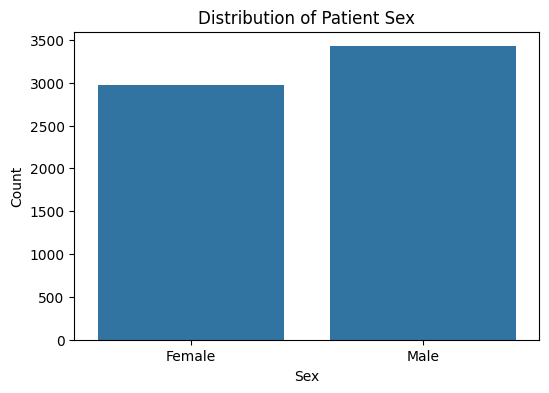

In [23]:
# --- Patient Sex ---
print("\n--- Univariate: Patient Sex ---")
print(df['patient_sex'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='patient_sex', data=df)
plt.title('Distribution of Patient Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### Observations:Distribution of the Patient Sex
- The above countplot shows that 53.6% of the patients consititutes the males which is the majority while 46.4% female participants.
- The dataset is fairly balanced by gender, which is important for model development.
- A well balanced number of male and female patients helps prevent gender bias and makes sure the model works well for both groups.
- Therefore, the small difference reflect real-world clinical patterns, where certain ocular diseases such as glaucoma, and diabetic retinopathy are mostly observed in males.


--- Univariate: Target Label (Disease) Distribution ---
d    2123
n    2101
o    1588
c     402
g     397
a     319
m     306
h     203
dtype: int64


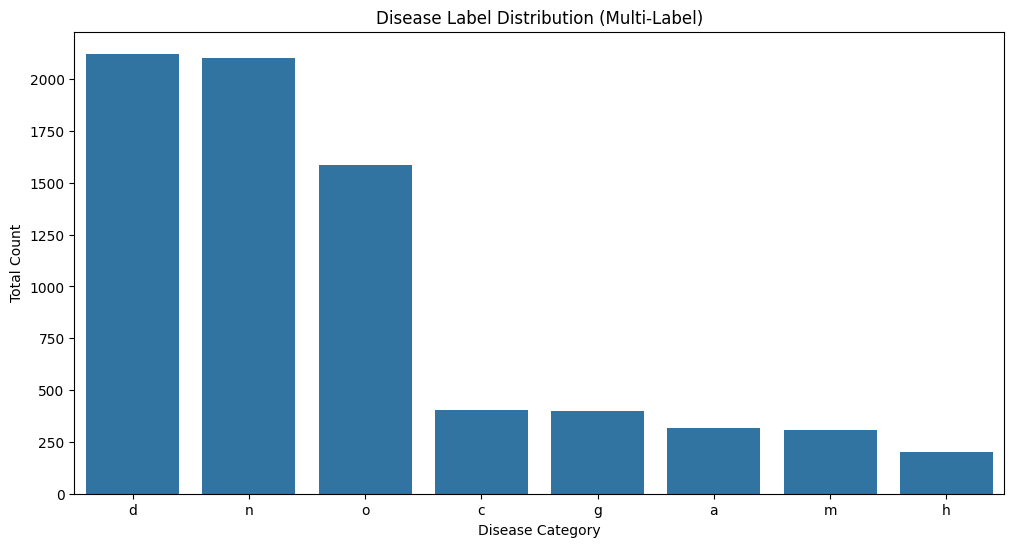

In [24]:
# --- Target Labels (Diseases) ---
print("\n--- Univariate: Target Label (Disease) Distribution ---")
# N=Normal, D=Diabetes, G=Glaucoma, C=Cataract, A=AMD, H=Hypertension, M=Myopia, O=Other
Ohe_cols = df[['n', 'd', 'g', 'c', 'a', 'h', 'm', 'o']]

disease_counts = Ohe_cols.sum().sort_values(ascending=False)
print(disease_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.title('Disease Label Distribution (Multi-Label)')
plt.xlabel('Disease Category')
plt.ylabel('Total Count')
plt.show()

#### Observations:Disease Label Distribution 
- The dataset covers eight ocular disease categories, Normal (n), Myopia (m), Diabetes (d), Glaucoma (g), Cataract (c), Hypertension (h), Age-related Macular Degeneration (a), and Other abnormalities (o).
- The histogram hows that Diabetes and Normal are the most common disease categories, each with over 2,000 samples, followed by Other abnormalities which is approximately 1600. The remaining diseases including Cataract, Glaucoma, AMD, Myopia, and Hypertension, have fewer than 500 samples showing a  class imbalance where some conditions occur more frequently, but it may cause the model to favor common diseases.
- We will address this imbalance to  ensure that the model detects both common and rare ocular conditions effectively.

### BIVARIATE ANALYSIS


--- Bivariate: Age vs. Disease ---


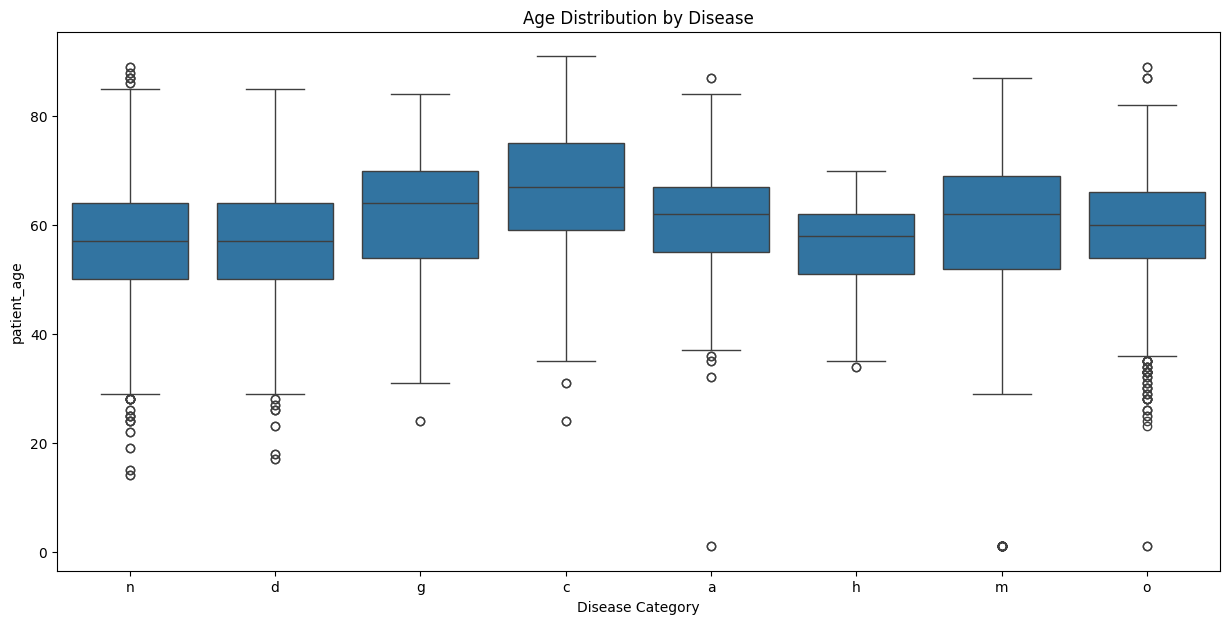

In [25]:
# --- Age vs. Disease ---
print("\n--- Bivariate: Age vs. Disease ---")

# We need to "melt" the DataFrame to make it easy for seaborn to plot
melted_df = df.melt(
    id_vars=['patient_age', 'patient_sex'], 
    value_vars=Ohe_cols, 
    var_name='Disease', 
    value_name='Has_Disease'
)
# We only want to plot for rows where the disease is present (Has_Disease == 1)
disease_present_df = melted_df[melted_df['Has_Disease'] == 1]

plt.figure(figsize=(15, 7))
sns.boxplot(x='Disease', y='patient_age', data=disease_present_df)
plt.title('Age Distribution by Disease')
plt.xlabel('Disease Category')
plt.ylabel('patient_age')
plt.show()

#### Observations:Age Versus Disease. 
- The boxplot above compares patient age across different ocular diseases. Each box represents how ages are spread for patients diagnosed with a particular condition.
- Overall, older patients (mostly above 50 years) dominate diseases such as Diabetes (d), Cataract (c), Glaucoma (g), and Age-related Macular Degeneration (a). In contrast, younger patients are more common in the Normal (n) and Myopia (m) groups.
- This pattern shows that age is strongly linked to ocular disease occurrence with most conditions being age-related, while normal vision and myopia are more frequent among younger individuals.


--- Bivariate: Sex vs. Disease ---


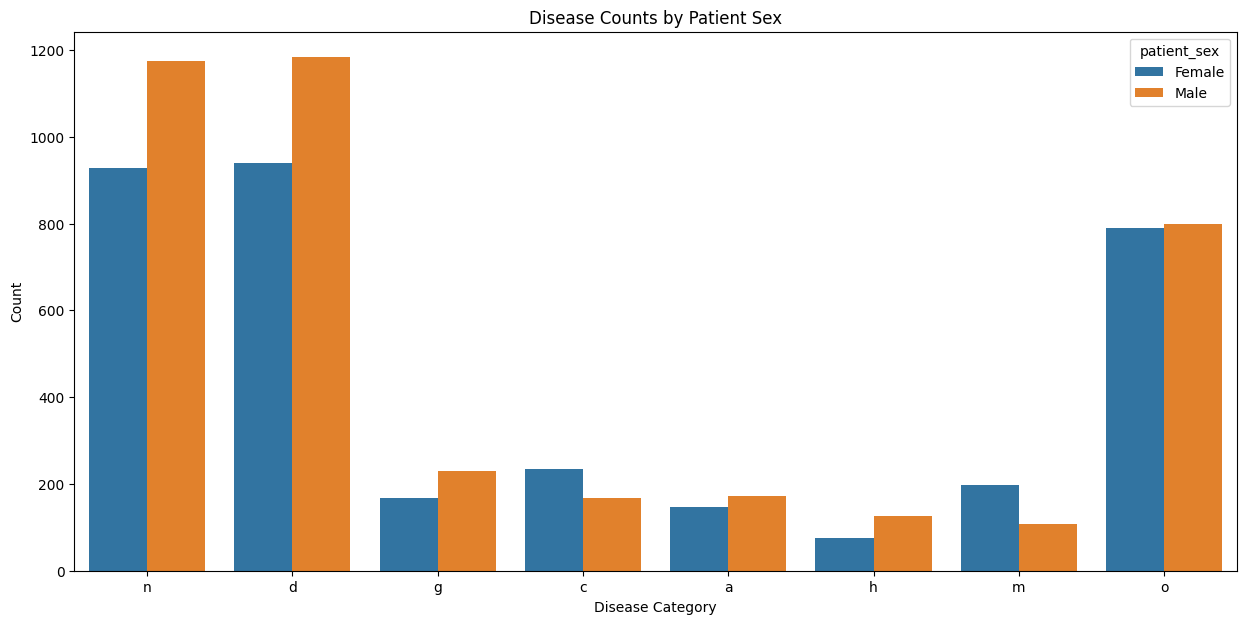

In [26]:
# --- Sex vs. Disease ---
print("\n--- Bivariate: Sex vs. Disease ---")
# We can re-use the 'disease_present_df' we created above

plt.figure(figsize=(15, 7))
# We use 'hue' to split the bars by 'Patient Sex'
sns.countplot(x='Disease', hue='patient_sex', data=disease_present_df)
plt.title('Disease Counts by Patient Sex')
plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.show()

#### Observations:Sex Versus Type of Disease
- The chart above compares the frequency of ocular diseases between male and female patients.  Each bar shows how many cases of each disease are associated with each sex. Understanding how ocular disease distribution varies by gender is important because it helps identify potential demographic trends and ensures the model remains unbiased across patient groups.
- The bar plot shows that the male patients have slightly higher counts in Normal (n) and Diabetes (d). The Normal and the Diabetes are the  most frequent categories overall.
- Female patients show marginally higher counts in Cataract (c) and Myopia (m) categories.
- For Glaucoma(g), Age-related Macular Degeneration(a), Hypertension(h), and Other abnormalities(o), the differences between males and females are minimal.
- Overall, sex is not a major determinant of ocular disease in this dataset, and the balanced representation supports fair and unbiased model learning.


--- Bivariate: Patient Age vs. Patient Sex ---
              count       mean        std   min   25%   50%   75%   max
patient_sex                                                            
Female       2968.0  59.025943  12.228377   1.0  53.0  60.0  66.0  89.0
Male         3424.0  56.845502  11.179272  15.0  50.0  57.0  65.0  91.0


C:\Users\Shifter\AppData\Local\Temp\ipykernel_848\550552019.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('patient_sex')['patient_age'].describe())


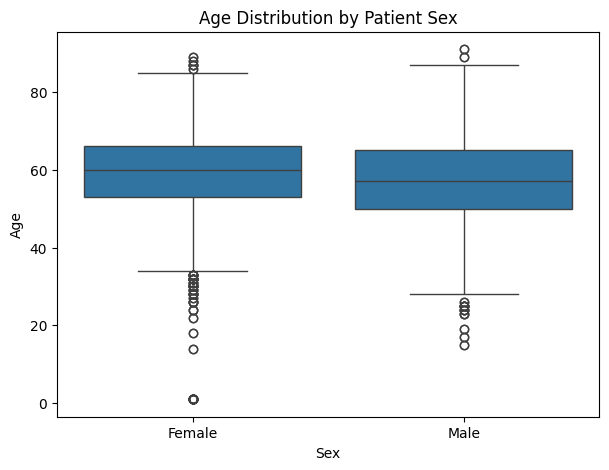

In [27]:

# --- Bivariate Plot: Age vs. Sex ---
print("\n--- Bivariate: Patient Age vs. Patient Sex ---")
print(df.groupby('patient_sex')['patient_age'].describe())  

plt.figure(figsize=(7, 5))
sns.boxplot(x='patient_sex', y='patient_age', data=df)  
plt.title('Age Distribution by Patient Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

#### Observations: Age Distribution by Patient Sex. 
- The average age for female patients is about 59 years, while for male patients it is around 57 years.
- The age range is similar for both groups, spanning from early adulthood to about 90 years.
- Both distributions show several outliers among younger patients, but the general spread is consistent across board.
- Therefore ,the two genders are well across a similar age range, with only a small difference in their mean ages. Females tend to be slightly older on average, which may reflect real-world trends where women often experience longer life expectancy and later onset of certain ocular conditions.

### MULTIVARIATE ANALYSIS


--- Multivariate: Disease Co-occurrence Heatmap ---


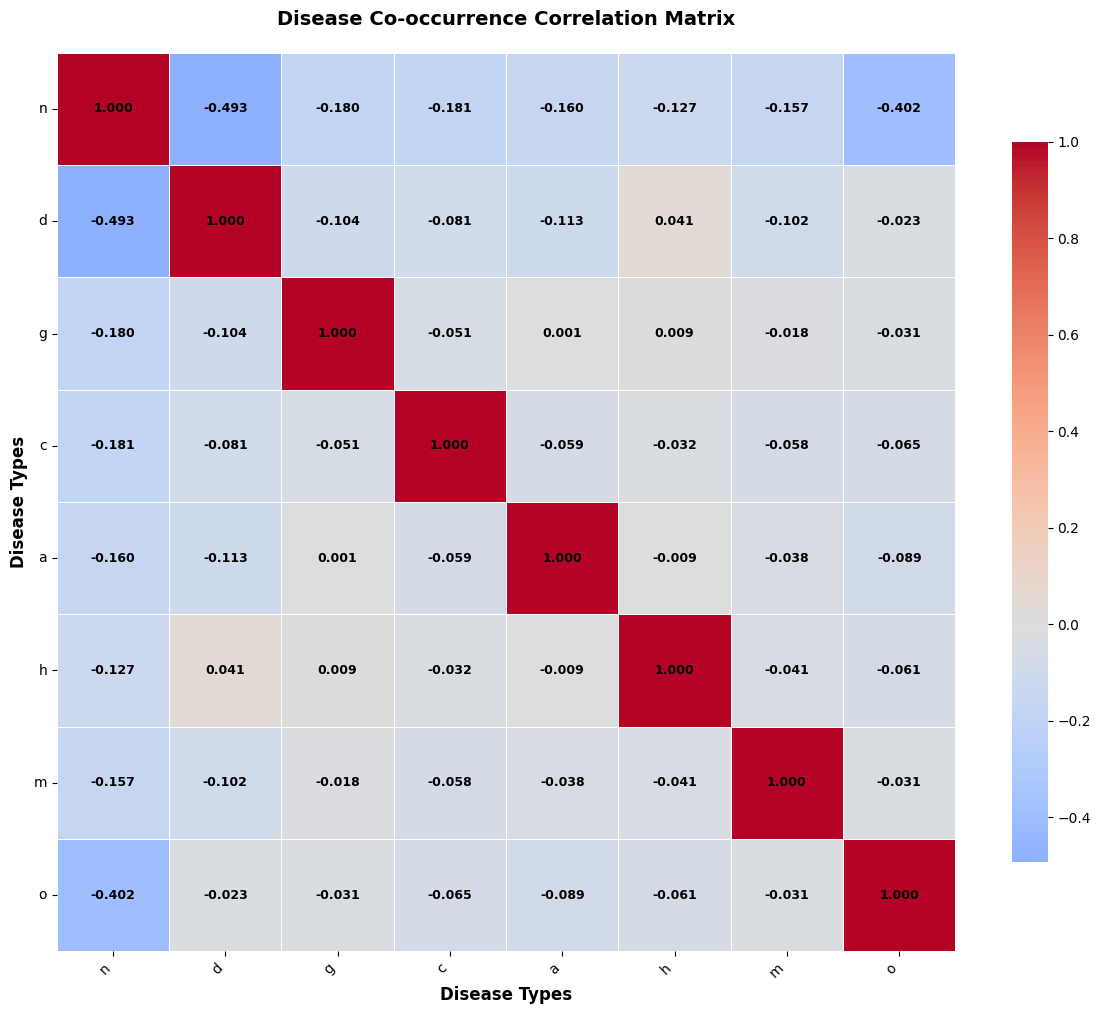

In [28]:
# --- Disease Co-occurrence ---
print("\n--- Multivariate: Disease Co-occurrence Heatmap ---")

correlation_matrix = Ohe_cols.corr()

fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap without annotations first
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=False,  
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    ax=ax
)

# Manually add annotations to every cell
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=9, weight='bold')

plt.title('Disease Co-occurrence Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Disease Types', fontsize=12, fontweight='bold')
plt.ylabel('Disease Types', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Observations: Disease Co-occurrence Correlation Matrix
- The heatmap above visualizes the correlation between different ocular diseases, showing how often they co-occur in patients.
- Correlation values range from –1 to +1, where:
+1 indicates perfect positive correlation (diseases occur together frequently)  and –1 indicates perfect negative correlation (if one occurs, the other rarely does).
From the matrix:
- Most disease pairs show weak or negative correlations, meaning they tend to occur independently.
- The strongest negative correlations are between Normal (n) and other diseases, especially Diabetes (d) (–0.49) and Other abnormalities (o) (–0.40). This is expected since “Normal” indicates the absence of disease.
- Slight positive relationships (near zero) between some conditions, such as Hypertension (h) and Diabetes (d), may suggest that the patient has 2 or more diseases. 
- Overall, the results show that ocular diseases rarely co-occur in the same patient, with the Normal class acting as a clear opposite of disease presence.

In [29]:
# from sklearn.cluster import KMeans
# import scipy.cluster.hierarchy as sch
# import numpy as np

# # --- Disease Pattern Clustering ---
# print("\n--- Multivariate: Disease Pattern Clustering ---")

# # Method 1: Set environment to avoid threading issues
# import os
# os.environ["LOKY_MAX_CPU_COUNT"] = "1"

# # Prepare data for clustering
# X = Ohe_cols.values

# # Hierarchical Clustering Dendrogram (always works)
# plt.figure(figsize=(12, 8))
# dendrogram = sch.dendrogram(sch.linkage(X.T, method='ward'))
# plt.title('Disease Co-occurrence Patterns\n(Hierarchical Clustering Dendrogram)')
# plt.xlabel('Diseases')
# plt.ylabel('Distance')
# plt.axhline(y=2, color='r', linestyle='--')
# plt.show()

# # Alternative K-means without threading issues
# try:
#     kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
#     disease_clusters = kmeans.fit_predict(X.T)
    
#     print("Disease Clusters Found:")
#     for i, disease in enumerate(Ohe_cols.columns):
#         print(f"  {disease}: Cluster {disease_clusters[i]}")
        
# except Exception as e:
#     print(f"K-means failed: {e}")
#     print("Using manual clustering based on correlations...")
    
#     # Manual clustering based on correlation patterns
#     correlation_matrix = Ohe_cols.corr()
#     print("Manual cluster analysis based on correlation patterns")

In [30]:
# Cell 1: Initial ODIR Cleaning (NO PATH JOINING YET)
import pandas as pd
import ast
import os 


clean_df = df[['filename', 'target']].copy()
clean_df['target_list'] = clean_df['target'].apply(ast.literal_eval)
clean_df = clean_df.drop(columns=['target'])
print("Initial clean_df created (Paths NOT added yet).")
clean_df.head()

Initial clean_df created (Paths NOT added yet).


,filename,target_list
0,0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [31]:
import pandas as pd
import os
import ast
from sklearn.model_selection import train_test_split # Make sure this is imported

# --- 1. Define the EXPANDED Label Map ---
# (Includes all folder names from ODIR and the two new datasets)
label_map = {
    'Normal':                       [1, 0, 0, 0, 0, 0, 0, 0],
    'Diabetes':                     [0, 1, 0, 0, 0, 0, 0, 0],
    'Glaucoma':                     [0, 0, 1, 0, 0, 0, 0, 0],
    'Cataract':                     [0, 0, 0, 1, 0, 0, 0, 0],
    'Age-related Macular Degeneration': [0, 0, 0, 0, 1, 0, 0, 0],
    'Hypertension':                 [0, 0, 0, 0, 0, 1, 0, 0],
    'Pathological Myopia':          [0, 0, 0, 0, 0, 0, 1, 0],
    'Other diseases/abnormalities': [0, 0, 0, 0, 0, 0, 0, 1],
    'normal':                       [1, 0, 0, 0, 0, 0, 0, 0],
    'diabetic_retinopathy':         [0, 1, 0, 0, 0, 0, 0, 0],
    'glaucoma':                     [0, 0, 1, 0, 0, 0, 0, 0],
    'cataract':                     [0, 0, 0, 1, 0, 0, 0, 0],
    'Retinoblastoma':               [0, 0, 0, 0, 0, 0, 0, 1],
    'N':                            [1, 0, 0, 0, 0, 0, 0, 0],
    'D':                            [0, 1, 0, 0, 0, 0, 0, 0],
    'G':                            [0, 0, 1, 0, 0, 0, 0, 0],
    'C':                            [0, 0, 0, 1, 0, 0, 0, 0],
    'A':                            [0, 0, 0, 0, 1, 0, 0, 0],
    'H':                            [0, 0, 0, 0, 0, 1, 0, 0],
    'M':                            [0, 0, 0, 0, 0, 0, 1, 0],
    'AMD':                          [0, 0, 0, 0, 1, 0, 0, 0],
    'Others':                       [0, 0, 0, 0, 0, 0, 0, 1],
    'Myopia':                        [0, 0, 0, 0, 0, 0, 1, 0],
}


In [32]:
df_new = pd.read_csv('Final.csv')

In [33]:
NEW_DATASET_3_IMAGE_DIR = "C:/Users/Shifter/Downloads/Training_Dataset_Final-20251027T210923Z-1-001/Training_Dataset_Final/Training_Dataset_Final"

In [34]:

# --- 2. Load and Clean Original ODIR-5K Data ---

# --- Build the FULL path correctly ONCE ---
# YOU MUST CHANGE THIS PATH
ODIR_IMAGE_DIR = "C:/Users/Shifter/Downloads/archive (5)/preprocessed_images"
clean_df['filename'] = clean_df['filename'].apply(lambda f: os.path.join(ODIR_IMAGE_DIR, f))
print("ODIR-5K paths built.")

# --- 3. Function to Process New Datasets ---
def process_new_dataset(base_dir, label_map):
    # ... (Keep the function definition exactly as before) ...
    new_data_rows = []
    for class_folder_name in os.listdir(base_dir):
        if class_folder_name in label_map:
            target_list = label_map[class_folder_name]
            class_dir = os.path.join(base_dir, class_folder_name)
            for img_filename in os.listdir(class_dir):
                full_image_path = os.path.join(class_dir, img_filename)
                new_data_rows.append({
                    'filename': full_image_path,
                    'target_list': target_list
                })
        else:
            print(f"Skipping folder (not in map): {class_folder_name} in {base_dir}")
    return pd.DataFrame(new_data_rows)


# --- 4. Define Paths and Process New Datasets ---
new_dataset_1_path = "C:/Users/Shifter/Downloads/archive (5)/augmented"
new_dataset_2_path = "C:/Users/Shifter/Downloads/archive (7)/preprocessed"

print("Processing new dataset 1...")
new_df_1 = process_new_dataset(new_dataset_1_path, label_map)
print(f"Found {len(new_df_1)} new images.")

print("\nProcessing new dataset 2...")
new_df_2 = process_new_dataset(new_dataset_2_path, label_map)
print(f"Found {len(new_df_2)} new images.")

# --- 5. Combine ALL THREE Clean DataFrames ---
combined_df_temp = pd.concat([clean_df, new_df_1, new_df_2], ignore_index=True)

# --- 6. Create the FINAL Clean DataFrame (Only 2 columns) ---
final_df = combined_df_temp[['filename', 'target_list']].copy()

# --- 7. Shuffle the Final DataFrame ---
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- Data Integration Complete ---")
print(f"Original ODIR-5K data: {len(clean_df)} images")
print(f"New dataset 1:        {len(new_df_1)} images")
print(f"New dataset 2:        {len(new_df_2)} images")
print(f"TOTAL combined data:  {len(final_df)} images")

print("\nFinal Combined DataFrame Head:")
print(final_df.head())

print("\nFinal Combined DataFrame Info:")
final_df.info()

ODIR-5K paths built.
Processing new dataset 1...
Found 4952 new images.

Processing new dataset 2...
Found 10449 new images.

--- Data Integration Complete ---
Original ODIR-5K data: 6392 images
New dataset 1:        4952 images
New dataset 2:        10449 images
TOTAL combined data:  21793 images

Final Combined DataFrame Head:
                                            filename               target_list
0  C:/Users/Shifter/Downloads/archive (7)/preproc...  [1, 0, 0, 0, 0, 0, 0, 0]
1  C:/Users/Shifter/Downloads/archive (5)/augment...  [0, 0, 0, 1, 0, 0, 0, 0]
2  C:/Users/Shifter/Downloads/archive (7)/preproc...  [1, 0, 0, 0, 0, 0, 0, 0]
3  C:/Users/Shifter/Downloads/archive (5)/preproc...  [0, 1, 0, 0, 0, 0, 0, 0]
4  C:/Users/Shifter/Downloads/archive (7)/preproc...  [0, 0, 0, 0, 1, 0, 0, 0]

Final Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21793 entries, 0 to 21792
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------   

In [35]:
df_new['filename'] = df_new['ID'].apply(lambda f: os.path.join(NEW_DATASET_3_IMAGE_DIR, f))

    # --- 4. Define the label columns in the correct order ---
    # Order: [N, D, G, C, A, H, M, O]
label_cols_final_csv = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']

    # Check if all expected label columns exist
missing_cols = [col for col in label_cols_final_csv if col not in df_new.columns]
if missing_cols:
        print(f"Error: Missing expected label columns in Final.csv: {missing_cols}")
        # Handle error appropriately (e.g., raise Exception or skip)
        raise ValueError("Missing label columns in Final.csv")

    # --- 5. Create the 'target_list' column ---
print("Creating 'target_list' from individual label columns...")
    # Select the label columns in the correct order and convert to a NumPy array
df_new['target_list'] = df_new[label_cols_final_csv].values.tolist()
    # Convert the list of lists into a list of NumPy arrays with dtype float32
df_new['target_list'] = df_new['target_list'].apply(lambda x: np.array(x, dtype=np.float32))


    # --- 6. Select only the necessary columns ---
df_new_clean = df_new[['filename', 'target_list']].copy()
print("Prepared new DataFrame 'df_new3_clean'.")

    # --- 7. Combine with the existing final_df ---
print("Combining with previous 'final_df'...")
    # Ensure final_df exists and has the correct columns before running this
final_df_combined = pd.concat([final_df, df_new_clean], ignore_index=True)

    # --- 8. Shuffle the newly combined DataFrame ---
final_df_combined = final_df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- Data Integration Complete ---")
print(f"Data before adding Final.csv: {len(final_df)} images")
print(f"Data from Final.csv:        {len(df_new_clean)} images")
print(f"TOTAL combined data:        {len(final_df_combined)} images")

print("\nNew Combined DataFrame Head:")
print(final_df_combined.head())

print("\nNew Combined DataFrame Info:")
final_df_combined.info()

# --- IMPORTANT: Update your main DataFrame variable ---
# Make sure subsequent steps (splitting, generators) use this new DataFrame
final_df = final_df_combined.copy()
print("\nVariable 'final_df' has been updated with the combined data.")

Creating 'target_list' from individual label columns...
Prepared new DataFrame 'df_new3_clean'.
Combining with previous 'final_df'...

--- Data Integration Complete ---
Data before adding Final.csv: 21793 images
Data from Final.csv:        15856 images
TOTAL combined data:        37649 images

New Combined DataFrame Head:
                                            filename  \
0  C:/Users/Shifter/Downloads/archive (7)/preproc...   
1  C:/Users/Shifter/Downloads/Training_Dataset_Fi...   
2  C:/Users/Shifter/Downloads/Training_Dataset_Fi...   
3  C:/Users/Shifter/Downloads/archive (7)/preproc...   
4  C:/Users/Shifter/Downloads/Training_Dataset_Fi...   

                                target_list  
0                  [1, 0, 0, 0, 0, 0, 0, 0]  
1  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
2  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]  
3                  [1, 0, 0, 0, 0, 0, 0, 0]  
4  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]  

New Combined DataFrame Info:
<class 'pandas.core.frame.DataFra

In [36]:
import pandas as pd
from PIL import Image
import os
import warnings

# --- 1. Settings ---
SAMPLE_SIZE = 500
if SAMPLE_SIZE > len(final_df): # Use the final_df from the previous cell
    SAMPLE_SIZE = len(final_df)

print(f"Analyzing a random sample of {SAMPLE_SIZE} images from final_df...")
warnings.filterwarnings("ignore", "(Possibly )?truncated (JPEG|PNG) file")

# --- 2. Create the sample DataFrame ---
sample_df = final_df.sample(SAMPLE_SIZE, random_state=42).copy() # Use final_df

# --- 3. Define function to get properties ---
def get_image_properties(filepath):
    # ... (Keep the function definition exactly as before) ...
    try:
        extension = os.path.splitext(filepath)[1].lower()
        with Image.open(filepath) as img:
            size = img.size
            mode = img.mode
        return pd.Series([size, mode, extension])
    except FileNotFoundError:
        print(f"Warning: File not found at {filepath}")
        return pd.Series([None, None, None])
    except Exception as e:
        print(f"Warning: Could not read {filepath}. Error: {e}")
        return pd.Series([None, None, None])


# --- 4. Run the analysis ---
sample_df[['image_size', 'image_mode', 'extension']] = \
    sample_df['filename'].apply(get_image_properties)

print("\n--- Analysis Complete ---")

# --- 5. Show the results ---
print("\nDataFrame with new properties:")
print(sample_df.head())
print("\n--- Top 10 Most Common Image Sizes ---")
print(sample_df['image_size'].value_counts().head(10))
print("\n--- Image Modes (Color vs. Grayscale) ---")
print(sample_df['image_mode'].value_counts())
print("\n--- Image File Types ---")
print(sample_df['extension'].value_counts())

Analyzing a random sample of 500 images from final_df...

--- Analysis Complete ---

DataFrame with new properties:
                                                filename  \
10210  C:/Users/Shifter/Downloads/archive (5)/augment...   
23896  C:/Users/Shifter/Downloads/archive (7)/preproc...   
28712  C:/Users/Shifter/Downloads/Training_Dataset_Fi...   
800    C:/Users/Shifter/Downloads/Training_Dataset_Fi...   
32190  C:/Users/Shifter/Downloads/archive (7)/preproc...   

                                    target_list    image_size image_mode  \
10210                  [0, 0, 0, 1, 0, 0, 0, 0]  (1728, 2592)        RGB   
23896                  [0, 0, 0, 1, 0, 0, 0, 0]    (512, 512)        RGB   
28712  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]    (224, 224)        RGB   
800    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]    (224, 224)        RGB   
32190                  [0, 1, 0, 0, 0, 0, 0, 0]  (2004, 1690)        RGB   

      extension  
10210      .jpg  
23896      .jpg  
28712      .

#### DATA PRE-PROCESSING

In [37]:
from sklearn.model_selection import train_test_split

print("--- Splitting the final combined DataFrame ---")

# Ensure final_df is your DataFrame with 'filename' and 'target_list' columns
# Replace final_df below if you used a different variable name

# First split: 80% for Train/Validation, 20% for Test
train_val_df, test_df = train_test_split(
    final_df,
    test_size=0.20,      # 20% for the final test set
    random_state=42      # Use a fixed state for reproducibility
)

# Second split: Split the 80% into Train (80%) and Validation (20%)
# This results in: 64% Train, 16% Validation, 20% Test overall
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.20,      # 20% OF the train_val_df (which is 80% of total)
    random_state=42      # Use the same state for consistency
)

print(f"Total images:   {len(final_df)}")
print(f"Training set:   {len(train_df)} images ({len(train_df)/len(final_df)*100:.1f}%)")
print(f"Validation set: {len(val_df)} images ({len(val_df)/len(final_df)*100:.1f}%)")
print(f"Test set:       {len(test_df)} images ({len(test_df)/len(final_df)*100:.1f}%)")

--- Splitting the final combined DataFrame ---
Total images:   37649
Training set:   24095 images (64.0%)
Validation set: 6024 images (16.0%)
Test set:       7530 images (20.0%)


In [38]:
# !pip install tensorflow

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np # Ensure numpy is imported if not already

print("\n--- Setting up Image Data Generators ---")

# --- Define Generator Settings ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# --- NEW FIX: Ensure target_list column contains lists of float32 ---
# Revert the previous conversion to NumPy arrays of arrays
final_df['target_list'] = final_df['target_list'].apply(lambda x: [float(val) for val in x])
# --- END OF FIX ---


# Generator for Training data (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator for Validation and Test data (ONLY normalization)
val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

# --- Flow from DataFrames ---
print("Creating generators...")

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,          # Use None because filename has full path
    x_col='filename',
    y_col='target_list',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw',        # Reads the list from y_col
    shuffle=True             # Shuffle training data
)

validation_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,          # Use None
    x_col='filename',
    y_col='target_list',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,   # Can use a larger batch size for evaluation if needed
    class_mode='raw',
    shuffle=False            # No need to shuffle validation
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,          # Use None
    x_col='filename',
    y_col='target_list',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=False            # No need to shuffle test
)

print("\n--- Generators Ready ---")

# --- Verification Step ---
# Get a sample batch to check the data type
sample_images, sample_labels = next(train_generator)
print(f"Verification: Data type of labels from train_generator: {sample_labels.dtype}")
print(f"Shape of labels from train_generator: {sample_labels.shape}")
# --- End Verification ---

# You can now use train_generator and validation_generator in model.fit()
# and test_generator in model.evaluate()


--- Setting up Image Data Generators ---
Creating generators...
Found 24095 validated image filenames.
Found 6024 validated image filenames.
Found 7530 validated image filenames.

--- Generators Ready ---
Verification: Data type of labels from train_generator: object
Shape of labels from train_generator: (32,)


In [40]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [41]:
IMG_SHAPE = (224, 224, 3) # Make sure this matches your IMG_SIZE

base_model = MobileNetV2(input_shape=IMG_SHAPE,
                         include_top=False, # Don't include the final ImageNet classifier layer
                         weights='imagenet')

# Freeze the base model - we only train our new layers initially
base_model.trainable = False

In [42]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(), # Flattens the output features
  Dense(128, activation='relu'),
  Dropout(0.5), # Add dropout for regularization
  Dense(8, activation='sigmoid') # 8 output neurons (for our 8 classes), sigmoid for multi-label
])

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Correct loss for multi-label with sigmoid
              metrics=['binary_accuracy', tf.keras.metrics.AUC(name='auc')]) # Use AUC as a key metric

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [45]:
final_df['target_list'] = final_df['target_list'].apply(lambda x: np.array(x, dtype=np.float32))
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import Sequence
from PIL import Image
import os

class MultiLabelDataGenerator(Sequence):
    def __init__(self, dataframe, image_dir, target_size=(224, 224), batch_size=32, augmentations=None, shuffle=True):
        self.dataframe = dataframe.reset_index(drop=True)
        self.image_dir = image_dir # This should already be included in the filename in the dataframe
        self.target_size = target_size
        self.batch_size = batch_size
        self.augmentations = augmentations
        self.shuffle = shuffle
        self.indices = np.arange(len(self.dataframe))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.dataframe.iloc[indices]
        X, y = self.__data_generation(batch_df)
        return X, y

    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_df):
        X = np.empty((self.batch_size, *self.target_size, 3), dtype=np.float32)
        y = np.empty((self.batch_size, len(batch_df.iloc[0]['target_list'])), dtype=np.float32)

        for i, row in enumerate(batch_df.itertuples()):
            img_path = row.filename
            try:
                img = Image.open(img_path).convert('RGB') # Ensure RGB
                img = img.resize(self.target_size)
                img_array = np.array(img, dtype=np.float32) / 255.0 # Normalize

                if self.augmentations:
                    # Apply augmentations if any (Placeholder - you would integrate something like imgaug or albumentations here)
                    # For now, we'll just use the base image if augmentations is True but not a callable
                    pass # Add actual augmentation logic here if needed later

                X[i,] = img_array
                y[i,] = np.array(row.target_list, dtype=np.float32) # Ensure label is float32 array

            except FileNotFoundError:
                print(f"Warning: Image file not found: {img_path}. Skipping this image.")
                # You might want to handle this more gracefully, e.g., replace with a blank image or remove row
                # For this simple example, we'll just skip and leave X[i] and y[i] empty for now
                # A more robust solution would require rebuilding the batch without this sample
                pass # Or implement more robust error handling

            except Exception as e:
                print(f"Warning: Error loading or processing image {img_path}: {e}. Skipping.")
                pass # Or implement more robust error handling


        # Basic handling for skipped images (replace with zeros)
        # In a real scenario, you'd filter out failed loads or handle them differently
        # This is a simple placeholder
        X = X[~np.all(X == 0, axis=(1, 2, 3))] # Remove rows that are all zeros (failed loads)
        y = y[~np.all(y == 0, axis=1)]


        return X, y

print("Custom MultiLabelDataGenerator defined.")

Custom MultiLabelDataGenerator defined.


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np # Make sure numpy is imported

# --- 1. Define Training Parameters ---
EPOCHS = 20 # Start with 20, EarlyStopping will stop it if needed
checkpoint_filepath = 'best_model.weights.h5'

# --- 2. Set Up Callbacks ---

# Stop training if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True # Automatically restore the best weights found
)

# Save only the best model weights based on validation loss
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True, # Change to False if you want the whole model
    monitor='val_loss',
    mode='min',
    save_best_only=True # Only save when val_loss improves
)

# --- 3. Create Custom Data Generators ---
print("--- Creating Custom Data Generators ---")

# Assuming IMG_SIZE and BATCH_SIZE are already defined
# Assuming train_df, val_df, and test_df are already created
# Assuming ODIR_IMAGE_DIR is defined (it was used in cell 11dc2bdc)

# You might not need image_dir argument for the custom generator
# if the full path is already in the 'filename' column.
# Let's pass None for image_dir and ensure filenames in dataframe are absolute paths.

# Using the custom generator class defined in cell X_q_hBf7hE8R
train_generator_custom = MultiLabelDataGenerator(
    dataframe=train_df,
    image_dir=None, # Full path expected in dataframe['filename']
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    augmentations=True, # Indicate to use augmentations (though placeholder in class for now)
    shuffle=True
)

validation_generator_custom = MultiLabelDataGenerator(
    dataframe=val_df,
    image_dir=None,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    augmentations=False, # No augmentation for validation
    shuffle=False
)

test_generator_custom = MultiLabelDataGenerator(
    dataframe=test_df,
    image_dir=None,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    augmentations=False, # No augmentation for test
    shuffle=False
)

print("\n--- Custom Generators Ready ---")


# --- 4. Train the Model ---
print("--- Starting Model Training ---")

history = model.fit(
    train_generator_custom, # Use the custom training generator
    epochs=EPOCHS,
    validation_data=validation_generator_custom, # Use the custom validation generator
    callbacks=[early_stopping, model_checkpoint], # Add our callbacks
    # Specify steps_per_epoch and validation_steps if using custom generator
    steps_per_epoch=len(train_generator_custom),
    validation_steps=len(validation_generator_custom)
)

print("\n--- Training Complete ---")

# --- 5. Load the Best Weights (Optional but recommended if restore_best_weights=False) ---
# If you used restore_best_weights=True in EarlyStopping, this isn't strictly needed
# but it's good practice to explicitly load the saved best weights.
# print(f"Loading best weights from {checkpoint_filepath}...")
# model.load_weights(checkpoint_filepath)


# --- 6. Evaluate on the Test Set ---
print("\n--- Evaluating Model on Test Set ---")

# Use the UNSEEN test_generator
results = model.evaluate(
    test_generator_custom, # Use the custom test generator
    steps=len(test_generator_custom)
)


print("\n--- Test Set Performance ---")
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Binary Accuracy: {results[1]:.4f}")
if len(results) > 2: # Check if AUC metric was calculated
    print(f"Test AUC: {results[2]:.4f}")


# --- 7. Plot Training History ---
print("\n--- Plotting Training History ---")

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc)) # Use actual number of epochs run

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# Optional: Plot AUC if available
if 'auc' in history.history:
    auc = history.history['auc']
    val_auc = history.history['val_auc']
    plt.figure(figsize=(6, 6))
    plt.plot(epochs_range, auc, label='Training AUC')
    plt.plot(epochs_range, val_auc, label='Validation AUC')
    plt.legend(loc='lower right')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.show()

print("\n--- Evaluation Complete ---")

--- Creating Custom Data Generators ---

--- Custom Generators Ready ---
--- Starting Model Training ---


c:\Users\Shifter\anaconda3\envs\bert_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
363/752 ━━━━━━━━━━━━━━━━━━━━ 32:13 5s/step - auc: 0.7430 - binary_accuracy: 0.8508 - loss: 0.3719

In [ ]:
# === ADD THIS CODE BLOCK AFTER PLOTTING ===

import numpy as np
from sklearn.metrics import classification_report

# --- 1. Get Predictions from the Test Set ---
print("\n--- Generating predictions for Classification Report ---")

# Reset the generator to ensure it starts from the beginning


# Predict probabilities
y_pred_proba = model.predict(
    test_generator_custom,
    steps=len(test_generator_custom), # Predict for all batches
    verbose=1
)

# --- 2. Apply Threshold to get Binary Predictions ---
threshold = 0.5
y_pred_binary = (y_pred_proba >= threshold).astype(int)

# --- 3. Get True Labels from the Custom Generator ---
print("Extracting true labels from the test generator...")
y_true = []
num_test_batches = len(test_generator_custom)

for i in range(num_test_batches):
    # Get batch data (images, labels) - Adjust if your generator yields differently
    try:
        _, labels_batch = test_generator_custom[i]
        y_true.extend(labels_batch) # Add the labels from the batch to our list
    except Exception as e:
        print(f"Error getting batch {i}: {e}")
        # Decide how to handle errors, maybe break or continue
        break
    if (i + 1) % 50 == 0: # Print progress
        print(f"  Processed batch {i+1}/{num_test_batches}")

# Convert list of label arrays/lists into a single NumPy array
y_true = np.array(y_true)

print(f"Finished extracting labels. Shape: {y_true.shape}")

# --- 4. Ensure Shapes Match (Very Important!) ---
print(f"Shape of y_true (true labels): {y_true.shape}")
print(f"Shape of y_pred_binary (predictions): {y_pred_binary.shape}")

# If the number of samples doesn't match exactly (sometimes happens with generators)
# Slice the predictions array to match the number of true labels collected.
if y_true.shape[0] != y_pred_binary.shape[0]:
    print(f"Warning: Mismatch in number of samples. Adjusting predictions ({y_pred_binary.shape[0]}) to match true labels ({y_true.shape[0]}).")
    min_samples = min(y_true.shape[0], y_pred_binary.shape[0])
    y_true = y_true[:min_samples]
    y_pred_binary = y_pred_binary[:min_samples]
    print(f"Adjusted shapes: y_true={y_true.shape}, y_pred_binary={y_pred_binary.shape}")

# --- 5. Generate and Print the Classification Report ---
# Define the names for your 8 classes in the correct order: [N, D, G, C, A, H, M, O]
class_names = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']

print("\n--- Classification Report (Per Class) ---")
# Use zero_division=0 to prevent warnings if a class has no predictions or no true samples in the test set
report = classification_report(y_true, y_pred_binary, target_names=class_names, zero_division=0)
print(report)

print("\n--- Overall Sample-Based Metrics (Micro/Macro Averages) ---")
try:
    report_dict = classification_report(y_true, y_pred_binary, target_names=class_names, output_dict=True, zero_division=0)
    print(f"Macro Avg F1-Score: {report_dict['macro avg']['f1-score']:.4f}")
    print(f"Weighted Avg F1-Score: {report_dict['weighted avg']['f1-score']:.4f}")
    print(f"Micro Avg F1-Score: {report_dict['micro avg']['f1-score']:.4f}") # Often useful for multi-label
except Exception as e:
    print(f"Could not calculate dictionary report: {e}")

# === END OF ADDED CODE BLOCK ===


--- Generating predictions for Classification Report ---
136/136 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step
Extracting true labels from the test generator...
  Processed batch 50/136
  Processed batch 100/136
Finished extracting labels. Shape: (4352, 8)
Shape of y_true (true labels): (4352, 8)
Shape of y_pred_binary (predictions): (4352, 8)

--- Classification Report (Per Class) ---
              precision    recall  f1-score   support

      Normal       0.64      0.69      0.66      1381
    Diabetes       0.81      0.50      0.62       957
    Glaucoma       0.80      0.61      0.69       664
    Cataract       0.88      0.83      0.85       528
         AMD       0.87      0.60      0.71       154
Hypertension       1.00      0.01      0.02       103
      Myopia       0.86      0.58      0.69       193
       Other       0.98      0.59      0.73       372

   micro avg       0.76      0.62      0.68      4352
   macro avg       0.85      0.55      0.62      4352
weighted avg       0.79   

In [ ]:
# Save the entire model (architecture, weights, optimizer state)
# Use the .keras format (recommended)
# model.save('my_ocular_model.keras')

# print("Model saved successfully as 'my_ocular_model.keras'")

Model saved successfully as 'my_ocular_model.keras'
